---------
---------

## Prediksi Penyakit Jantung Dengan Machine Learning

------------
----------

In [163]:
# import library yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,OneHotEncoder

## Auto Ml

In [164]:
from jcopml.automl import AutoClassifier

df = pd.read_csv('heartDisease.csv')
df

,Unnamed: 0,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
0,0,63,Laki-laki,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,1,Jantung
1,1,37,Laki-laki,Non-anginal pain,130,250,0,1,187,0,3.5,Upsloping,0,2,Jantung
2,2,41,Perempuan,Atypical angina,130,204,0,0,172,0,1.4,Downslopins,0,2,Jantung
3,3,56,Laki-laki,Atypical angina,120,236,0,1,178,0,0.8,Downslopins,0,2,Jantung
4,4,57,Perempuan,Typical angina,120,354,0,1,163,1,0.6,Downslopins,0,2,Jantung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,Perempuan,Typical angina,140,241,0,1,123,1,0.2,Flatsloping,0,3,Normal
299,299,45,Laki-laki,Asymptomatic,110,264,0,1,132,0,1.2,Flatsloping,0,3,Normal
300,300,68,Laki-laki,Typical angina,144,193,1,1,141,0,3.4,Flatsloping,2,3,Normal
301,301,57,Laki-laki,Typical angina,130,131,0,1,115,1,1.2,Flatsloping,1,3,Normal


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           303 non-null    int64  
 1   usia                 303 non-null    int64  
 2   jenis kelamin        303 non-null    object 
 3   nyeri dada           303 non-null    object 
 4   trestbps             303 non-null    int64  
 5   cholestoral          303 non-null    int64  
 6   fasting blood sugar  303 non-null    int64  
 7   restecg              303 non-null    int64  
 8   denyut jantung       303 non-null    int64  
 9   exang                303 non-null    int64  
 10  oldpeak              303 non-null    float64
 11  slope                303 non-null    object 
 12  ca                   303 non-null    int64  
 13  thalium              303 non-null    int64  
 14  diagnosis            303 non-null    object 
dtypes: float64(1), int64(10), object(4)
memo

In [166]:
label = LabelEncoder()

cat = df.select_dtypes(include='object').columns

for i in cat :
    df[i] = label.fit_transform(df[[i]])

c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

In [167]:
# spilitind data

X = df.drop(columns=['Unnamed: 0', 'diagnosis'])
y = df['diagnosis']

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           303 non-null    int64  
 1   usia                 303 non-null    int64  
 2   jenis kelamin        303 non-null    int64  
 3   nyeri dada           303 non-null    int64  
 4   trestbps             303 non-null    int64  
 5   cholestoral          303 non-null    int64  
 6   fasting blood sugar  303 non-null    int64  
 7   restecg              303 non-null    int64  
 8   denyut jantung       303 non-null    int64  
 9   exang                303 non-null    int64  
 10  oldpeak              303 non-null    float64
 11  slope                303 non-null    int64  
 12  ca                   303 non-null    int64  
 13  thalium              303 non-null    int64  
 14  diagnosis            303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 3

In [169]:
X.columns

Index(['usia', 'jenis kelamin', 'nyeri dada', 'trestbps', 'cholestoral',
       'fasting blood sugar', 'restecg', 'denyut jantung', 'exang', 'oldpeak',
       'slope', 'ca', 'thalium'],
      dtype='object')

In [170]:
model_auto = AutoClassifier(['usia', 'jenis kelamin', 'nyeri dada', 'trestbps', 'cholestoral',
       'fasting blood sugar', 'restecg', 'denyut jantung', 'exang', 'oldpeak',
       'slope', 'ca', 'thalium'],['jenis kelamin','nyeri dada'],)

In [171]:
model_auto.fit(X,y, cv=3)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
================== Best Model Info ==================
algo                      | XGBClassifier
algo__colsample_bytree    | 0.14070456001948428
algo__gamma               | 8
algo__learning_rate       | 0.48872853588355797
algo__max_depth           | 2
algo__n_estimators        | 152
algo__reg_alpha           | 0.22233337605920384
algo__reg_lambda          | 7.2614145160288395
algo__subsample           | 0.6035171238433423

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=False, strategy='median')
numerical_poly            | PolynomialFeatures
numerical_scaler          | Normalizer

=========== Score ===========
Train: 0.87186565447435
Valid: 0.8387345679012346
Test : 0.8360655737704918


c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


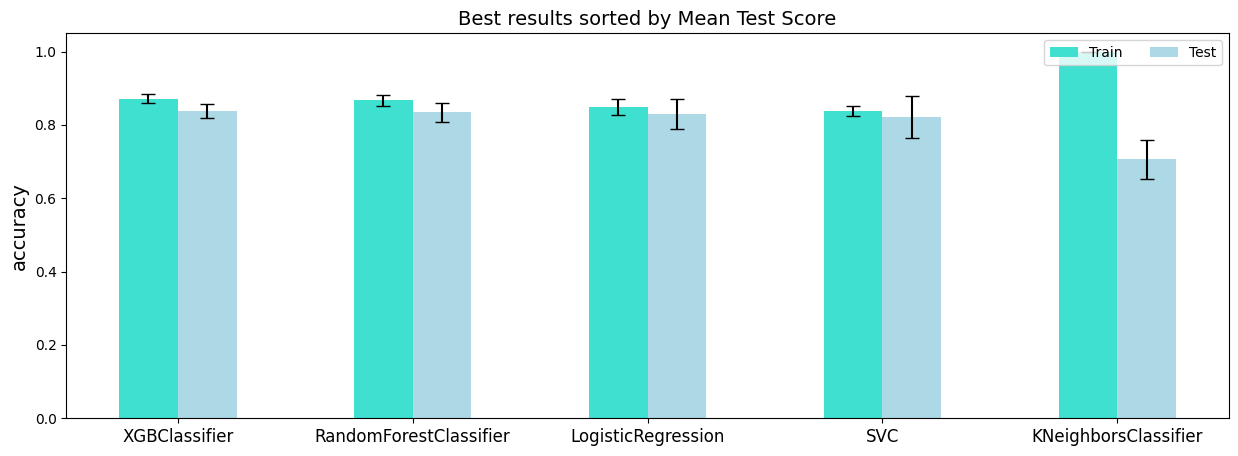

In [172]:
model_auto.plot_results()
plt.savefig('Auto ML - model.png')

-----

In [173]:
# load data 
data = pd.read_csv('heartDisease.csv')
data

,Unnamed: 0,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
0,0,63,Laki-laki,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,1,Jantung
1,1,37,Laki-laki,Non-anginal pain,130,250,0,1,187,0,3.5,Upsloping,0,2,Jantung
2,2,41,Perempuan,Atypical angina,130,204,0,0,172,0,1.4,Downslopins,0,2,Jantung
3,3,56,Laki-laki,Atypical angina,120,236,0,1,178,0,0.8,Downslopins,0,2,Jantung
4,4,57,Perempuan,Typical angina,120,354,0,1,163,1,0.6,Downslopins,0,2,Jantung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,Perempuan,Typical angina,140,241,0,1,123,1,0.2,Flatsloping,0,3,Normal
299,299,45,Laki-laki,Asymptomatic,110,264,0,1,132,0,1.2,Flatsloping,0,3,Normal
300,300,68,Laki-laki,Typical angina,144,193,1,1,141,0,3.4,Flatsloping,2,3,Normal
301,301,57,Laki-laki,Typical angina,130,131,0,1,115,1,1.2,Flatsloping,1,3,Normal


In [174]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           303 non-null    int64  
 1   usia                 303 non-null    int64  
 2   jenis kelamin        303 non-null    object 
 3   nyeri dada           303 non-null    object 
 4   trestbps             303 non-null    int64  
 5   cholestoral          303 non-null    int64  
 6   fasting blood sugar  303 non-null    int64  
 7   restecg              303 non-null    int64  
 8   denyut jantung       303 non-null    int64  
 9   exang                303 non-null    int64  
 10  oldpeak              303 non-null    float64
 11  slope                303 non-null    object 
 12  ca                   303 non-null    int64  
 13  thalium              303 non-null    int64  
 14  diagnosis            303 non-null    object 
dtypes: float64(1), int64(10), object(4)
memo

In [175]:
data.shape


(303, 15)

### Visualization

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_37188\2625701638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['diagnosis'], palette='Set2')


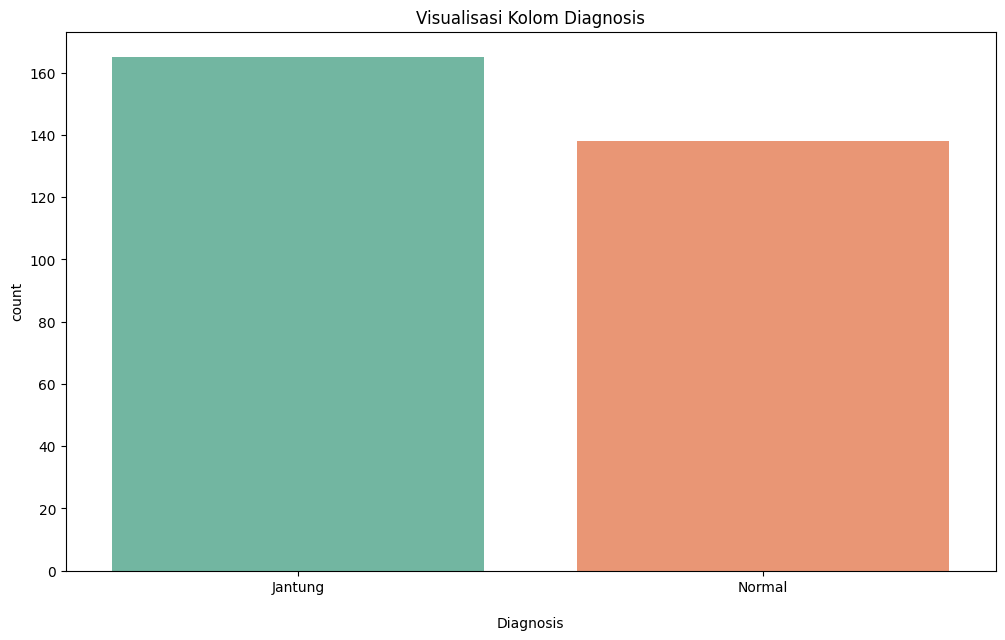

In [176]:
# visualisasi kolom target 'diagnosis'
plt.figure(figsize=(12,7))
sns.countplot(x=data['diagnosis'], palette='Set2')
plt.title('Visualisasi Kolom Diagnosis')
plt.xlabel('\nDiagnosis')
plt.show()

Kolom diagnosis  dapat dikatakna seimbang

<Axes: >

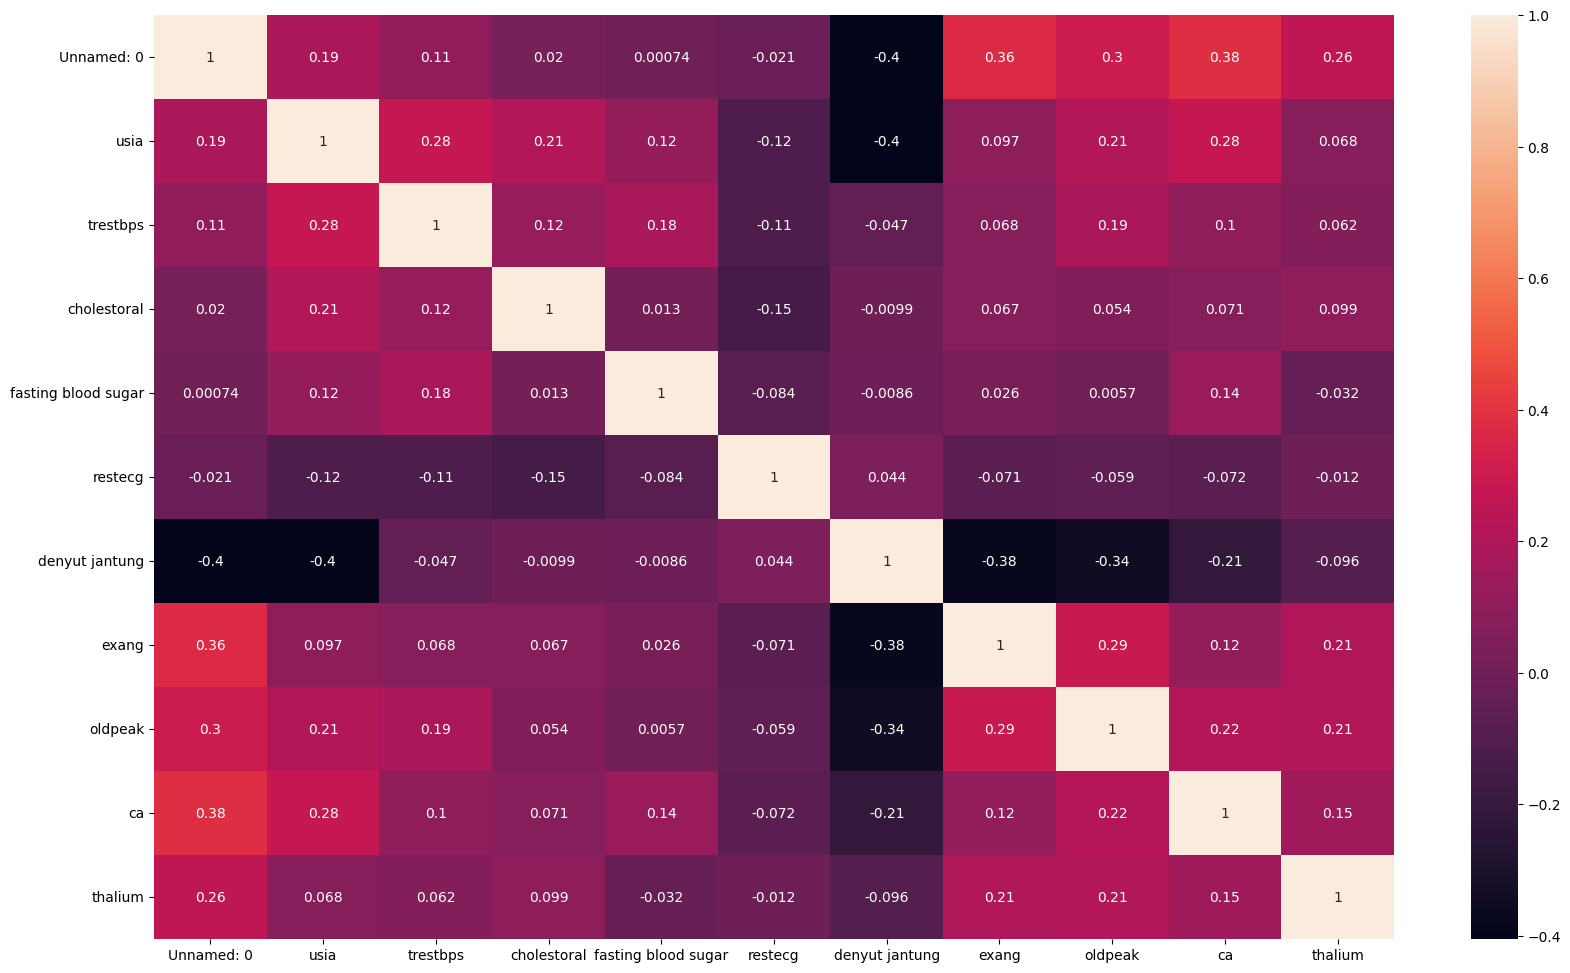

In [177]:
# Korelasi antar kolom

num = data.select_dtypes(include='number').columns

plt.figure(figsize=(20,12))
sns.heatmap(data[num].corr(), annot=True)

### Cleaning Data

In [178]:
# Cek data duplikat
data.duplicated().sum()

np.int64(0)

In [179]:
# cek mising values 
data.isnull().sum()

Unnamed: 0             0
usia                   0
jenis kelamin          0
nyeri dada             0
trestbps               0
cholestoral            0
fasting blood sugar    0
restecg                0
denyut jantung         0
exang                  0
oldpeak                0
slope                  0
ca                     0
thalium                0
diagnosis              0
dtype: int64

### Modeling

In [180]:
data.head()

,Unnamed: 0,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
0,0,63,Laki-laki,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,1,Jantung
1,1,37,Laki-laki,Non-anginal pain,130,250,0,1,187,0,3.5,Upsloping,0,2,Jantung
2,2,41,Perempuan,Atypical angina,130,204,0,0,172,0,1.4,Downslopins,0,2,Jantung
3,3,56,Laki-laki,Atypical angina,120,236,0,1,178,0,0.8,Downslopins,0,2,Jantung
4,4,57,Perempuan,Typical angina,120,354,0,1,163,1,0.6,Downslopins,0,2,Jantung


In [181]:
# Spiliting data

data1 = data.copy()
X = data1.drop(columns=['Unnamed: 0', 'diagnosis'])
y = data1['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [182]:
# pipline rules
from sklearn.pipeline import Pipeline

num = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

cat = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           303 non-null    int64  
 1   usia                 303 non-null    int64  
 2   jenis kelamin        303 non-null    object 
 3   nyeri dada           303 non-null    object 
 4   trestbps             303 non-null    int64  
 5   cholestoral          303 non-null    int64  
 6   fasting blood sugar  303 non-null    int64  
 7   restecg              303 non-null    int64  
 8   denyut jantung       303 non-null    int64  
 9   exang                303 non-null    int64  
 10  oldpeak              303 non-null    float64
 11  slope                303 non-null    object 
 12  ca                   303 non-null    int64  
 13  thalium              303 non-null    int64  
 14  diagnosis            303 non-null    object 
dtypes: float64(1), int64(10), object(4)
memo

In [184]:
from sklearn.compose import ColumnTransformer

preprocesor = ColumnTransformer(
    transformers=[
        ('numerik',num,['usia', 'trestbps','cholestoral', 'denyut jantung'
            , 'oldpeak', 'ca', 'thalium',]),
        ('categorik',cat,['jenis kelamin', 'nyeri dada','slope', 'fasting blood sugar', 'restecg', 'exang', ])
    ]
)

In [185]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_jobs=-1, random_state=42)

Pipeline = Pipeline([
    ('preprocesor', preprocesor),
    ('algo', model1)
])

Pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['usia', 'trestbps',
                                                   'cholestoral',
                                                   'denyut jantung', 'oldpeak',
                                                   'ca', 'thalium']),
                                                 ('categorik',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['jenis kelamin',
                                                   'nyeri dada', 'slope',
                                                   'fasting blood sugar',
                                                   'restecg', 'exang'])])),
                ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [186]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

y_pred = Pipeline.predict(X_test)
print(f'Akurasi model = {accuracy_score(y_test,y_pred)} \n\n',classification_report(y_test,y_pred) )

Akurasi model = 0.8688524590163934 

               precision    recall  f1-score   support

     Jantung       0.85      0.91      0.88        32
      Normal       0.89      0.83      0.86        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Evalution

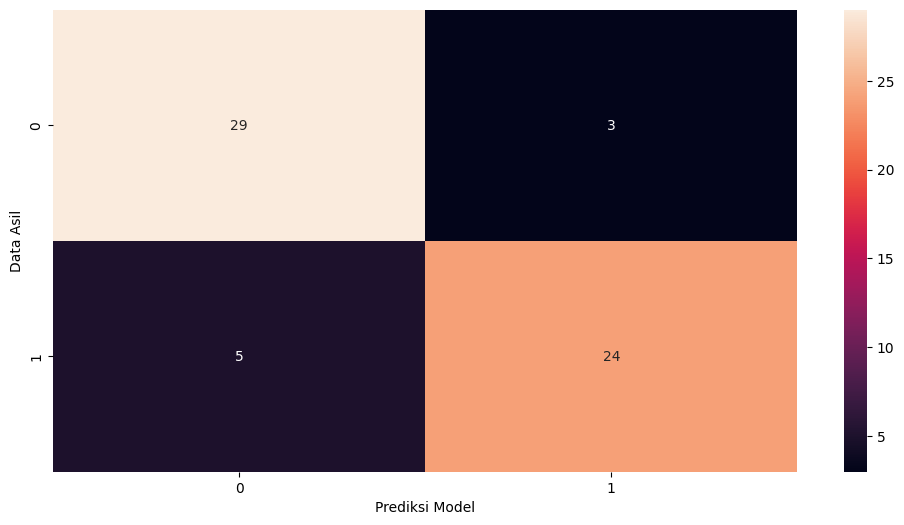

In [187]:
# Confusion matriks model

matriks = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
sns.heatmap(matriks, annot=True)
plt.ylabel('Data Asil')
plt.xlabel("Prediksi Model")
plt.show()

Model berhasil memprediksi dengan akurasi sebesar 0.87%. Model ini dapat dikatakn cukup baik dalam memprediksi. Berdasarakan skoring model tersebut dapat dilihat confusion matriks diatas bahwa : 

- class 0, model berhasil mempredik 25 data yang benar dan 3 kesalahan.

- class 1, model berhasil memprediksi 24 data dengan benar dan 5 kesalahan.

In [188]:
# Tuning model hypermeter
from sklearn.model_selection import GridSearchCV

params = {
    'algo__n_estimators' : [100,150,200],
    'algo__max_depth' : [20,50,80],
    'algo__max_features' : [0.3,0.6,0.8],
    'algo__min_samples_leaf' : [1,5,10]
}

model2 = GridSearchCV(Pipeline,param_grid=params,cv=3, n_jobs=-1, verbose=True)
model2.fit(X_train,y_train)

model2.score(X_test,y_test), model2.score(X_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


(0.8688524590163934, 0.9090909090909091)

In [189]:
y_pred2 = model2.predict(X_test)
print(f'Akurasi score = {accuracy_score(y_test,y_pred2)} \n\n',   classification_report(y_test,y_pred2))

Akurasi score = 0.8688524590163934 

               precision    recall  f1-score   support

     Jantung       0.88      0.88      0.88        32
      Normal       0.86      0.86      0.86        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Feature Importance

Pada tahap ini akan menilai seberapa penting setiap fitur pada dataset ini. Hal ini dilakukan untuk membantu dalam memahami kontribusi setiap fitur terhdap prediksi model.

1. Mean Loss Descrease - Cara 1

Pada hal ini, akan melihat rata rata pengurang eror/loss yang dikontribusikan setia fitur. untuk kasus klassifikasi, loss yang dipakai adalha gini-impurity, jadi sering disebut sebagai mean impurity decrease. Untuk kasus regres, loss yang dipakai adalah MSE, mungkin disebut sebagi meas MSE decrease ()
loss --> criterin.

*Semakin besar loss yang berhasil diturunkan oleh suatu fitur, maka semakin penting fitur tersebut.

In [190]:
# print(len(cols), len(imp))

In [191]:
# from jcopml.feature_importance import mean_loss_decreas

# df_imp = mean_loss_decrease(X_train, model2, plot=True, topk=10)

2. Mean Score Decrease - cara 2 

Pada cara ini, masing masing variabel akan diacak dan dilihat beberapa pengurangn score yang terjadi. semakin besar penurunan score, artinya fitur itu semakin penting

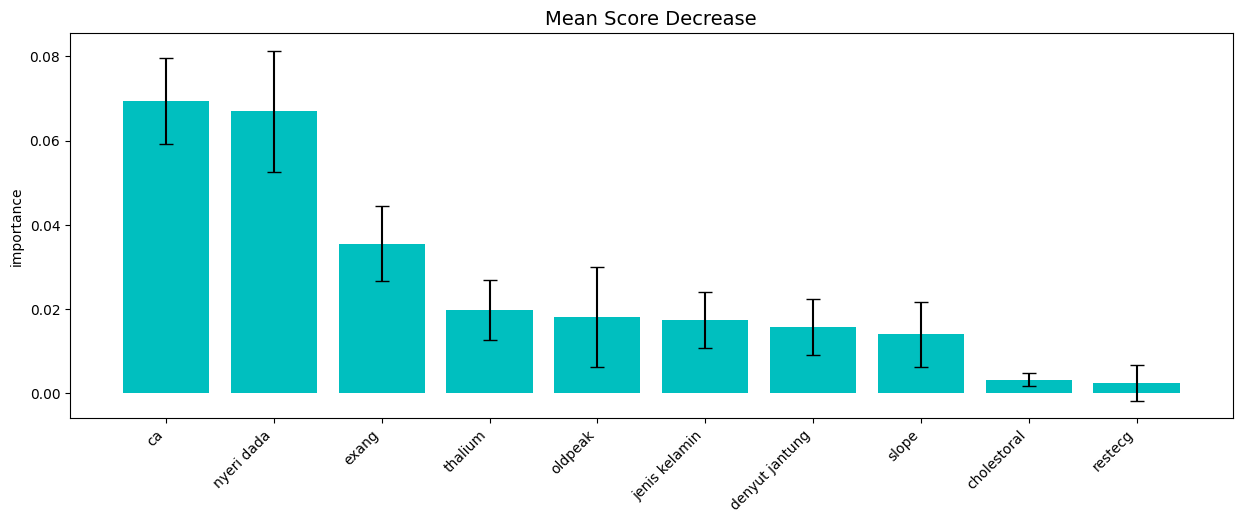

In [192]:
from jcopml.feature_importance import mean_score_decrease

df_imp = mean_score_decrease(X_train, y_train, model2, plot=True, topk=10)

Visualisasi diatas menampilkan beberapa fitur yang memiliki kontribusi atau efektivitas fitur tersebut dalam analisis ini. Hal ini dapat dikalukan untuk memilih kolom atau fitur apa saja yang dapat dijadikan sebagai bahan ajuan mesin belajar berdasarkan data. Kolom  cholestoral  dan  restecg, memiliki score penurun yang rendah. hal ini dapat dikatakan bahwa kedua fitur tersebut tidak begitu efektivitas pada train ini. 

In [193]:
# pipline rules
from sklearn.pipeline import Pipeline

num_pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

cat_pipe = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

In [194]:
from sklearn.compose import ColumnTransformer
# from jcopml.pipeline import num_pipe, cat_pipe

preprocesor3 = ColumnTransformer(
    transformers=[
        ('numerik',num_pipe,['usia', 'trestbps', 'denyut jantung'
            , 'oldpeak', 'ca', 'thalium',]),
        ('categorik',cat_pipe,['jenis kelamin', 'nyeri dada','slope', 'fasting blood sugar', 'exang', ])
    ]
)

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

model3 = RandomForestClassifier(n_jobs=-1, random_state=42)

Pipeline3 = Pipeline([
    ('preprocesor', preprocesor3),
    ('algo', model3)
])

model3 = GridSearchCV(Pipeline3,params, cv=3, n_jobs=-1,verbose=1)
model3.fit(X_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocesor',
                                        ColumnTransformer(transformers=[('numerik',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['usia',
                                                                          'trestbps',
                                                                          'denyut '
                                                                          'jantung',
                                                                          'oldpeak',
                                                                          'ca',
                                                                          'thalium']),
                                                                        ('categorik',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['jenis '
                                                                          'kelamin',
                                                                          'nyeri '
                                                                          'dada',
                                                                          'slope',
                                                                          'fasting '
                                                                          'blood '
                                                                          'sugar',
                                                                          'exang'])])),
                                       ('algo',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [20, 50, 80],
                         'algo__max_features': [0.3, 0.6, 0.8],
                         'algo__min_samples_leaf': [1, 5, 10],
                         'algo__n_estimators': [100, 150, 200]},
             verbose=1)

In [196]:
y_pred3 = model3.predict(X_test)
print(f'Akurasi model = {accuracy_score(y_test,y_pred3)} \n\n' , classification_report(y_test,y_pred3))

Akurasi model = 0.8852459016393442 

               precision    recall  f1-score   support

     Jantung       0.88      0.91      0.89        32
      Normal       0.89      0.86      0.88        29

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



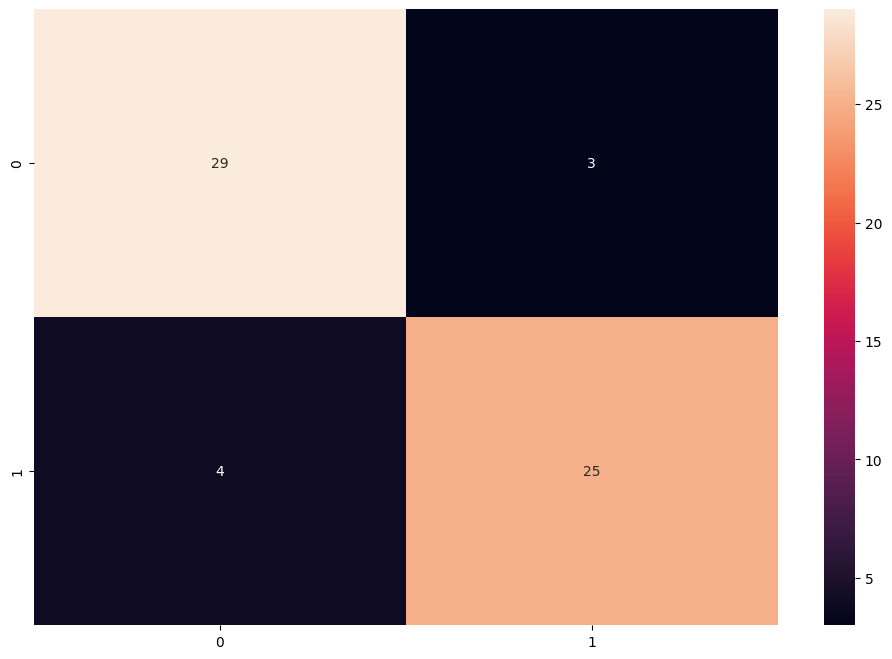

In [197]:
# confusiom matriks - model3

matriks3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(12,8))
sns.heatmap(matriks3, annot=True)

plt.show()

Dengan melakukan feature importance dan hyperparameters tuning dengan grid Search dengan, teknik ini berhasil meningkat kinerja dan akurasi model.Model berhasi melakukan prediction : 

- class 0, true 29 dan false 3

- class 1, true 25 dan false 4

-----

-----

### Test Model

In [198]:
data['diagnosis'].value_counts()

diagnosis
Jantung    165
Normal     138
Name: count, dtype: int64

In [199]:
data[data['diagnosis'] == 'Normal']

,Unnamed: 0,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
165,165,67,Laki-laki,Typical angina,160,286,0,0,108,1,1.5,Flatsloping,3,2,Normal
166,166,67,Laki-laki,Typical angina,120,229,0,0,129,1,2.6,Flatsloping,2,3,Normal
167,167,62,Perempuan,Typical angina,140,268,0,0,160,0,3.6,Upsloping,2,2,Normal
168,168,63,Laki-laki,Typical angina,130,254,0,0,147,0,1.4,Flatsloping,1,3,Normal
169,169,53,Laki-laki,Typical angina,140,203,1,0,155,1,3.1,Upsloping,0,3,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,Perempuan,Typical angina,140,241,0,1,123,1,0.2,Flatsloping,0,3,Normal
299,299,45,Laki-laki,Asymptomatic,110,264,0,1,132,0,1.2,Flatsloping,0,3,Normal
300,300,68,Laki-laki,Typical angina,144,193,1,1,141,0,3.4,Flatsloping,2,3,Normal
301,301,57,Laki-laki,Typical angina,130,131,0,1,115,1,1.2,Flatsloping,1,3,Normal


In [200]:
# Pengujian model

df_test = [
    [41,'Perempuan','Atypical angina',130,204,0,0,172,0,1.4,'Downslopins',0,2],
    [42, "Laki-laki",'Atypical angina',120,295,0,1,162,0,0.0,'Downslopins',0,2],
    [67,'Laki-laki','Typical angina',160,286,0,0,108,1,1.5,'Flatsloping',3,2]
]


In [201]:
X_pred = pd.DataFrame(df_test, index=["Marto","Logan", "Olan"], columns=X.columns)
X_pred

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium
Marto,41,Perempuan,Atypical angina,130,204,0,0,172,0,1.4,Downslopins,0,2
Logan,42,Laki-laki,Atypical angina,120,295,0,1,162,0,0.0,Downslopins,0,2
Olan,67,Laki-laki,Typical angina,160,286,0,0,108,1,1.5,Flatsloping,3,2


In [202]:
X_pred['diagnosis'] = model3.predict(X_pred)
X_pred

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
Marto,41,Perempuan,Atypical angina,130,204,0,0,172,0,1.4,Downslopins,0,2,Jantung
Logan,42,Laki-laki,Atypical angina,120,295,0,1,162,0,0.0,Downslopins,0,2,Jantung
Olan,67,Laki-laki,Typical angina,160,286,0,0,108,1,1.5,Flatsloping,3,2,Normal


### Save Model 

In [204]:
import pickle

name = 'model.pkl'
pickle.dump(model3,open(name,'wb'))